# Project in Social Data Analysis

Data links:
- https://www.opendata.dk/city-of-copenhagen/trae_basis 
- https://www.opendata.dk/city-of-copenhagen/gadetraeer

Inspiration til vores illustration:
https://www.cloudred.com/labprojects/nyctrees/

ANSWER ON the questions:
	The movie must contain the following: 
    
**- An explanation of the central idea behind your final project (what is the idea? which datasets do you need to explore the idea?, why is it interesting?)**
    Inspiration from an website displacing the trees in five neighbourghood in NY. So we want to make the same over CPH. Right now we have two datasets, of different sizes and with different features. (Choose one or merges?). It is interesting to see want we can find in the data. What patterns will reveal itself? 
    
Be ready to safe the trees from corona.

**- A mock up of the visualization that you wish to build. (Anything is fine here. Pen and paper, MS Paint, Inkscape, D3, anything.).**
    
    - Make sure you answer the questions:
        - What genre is it? (for Genres, see section 4.3 of the Segel and Heer paper) 
        - Why is that genre right for telling the story you want to communicate with the data
    - An outline on the elements you'll need to get to your goal.
    - The implementation plan.
    - A walk-through of your preliminary data-analysis, addressing
        - What is the total size of your data? (MB, number of rows, number of variables, etc)
        - What are other properties? (What is the date range? Is is it geo-data?, then a quick plot of locations, etc.)
        - Show the fundamental distributions of the data (similar to the work we did on SF crime data for lecture 3) But other than that, there are no constraints. And we do appreciate funny/inventive/beautiful movies, although the academic content is most important. Note that we'll display the movie to the entire class.**

**Genre:** A mix between an **Annotated chart** and **Partitioned poster**, it suits good to our data and the ideas we have about telling a story and connections over the trees of CPH. 

**Outline of elements:** Interaction between barchart and maps. Decide on features to investigate further. How has the longest distance to a tree. 

**Implementation plan:** Basically how we want to build up an interactive webpage from github. 

**Preliminary data-analysis:** Size between (19956, 28) and (59580, 183) (observations, features).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
path="/Users/jesperdybkjaer/Documents/DTU/Kandidat/4.semester/3_SocialDataanalysisAndVisualization/Final_project"
os.chdir(path)

In [3]:
df1 = pd.read_csv("gadetraer.csv") #The first data found
df2 = pd.read_csv("trae_basis.csv") #The second dataset found (bigger and more features)

/Users/jesperdybkjaer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,41,46,47,48,49,50,62,64,65,69,71,73,76,79,83,89,103,117,122,135,136,137,147,156,157,158,167,168,174,175,176,177,178,179,180,181) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(f"The shape of dataset 1 is: {df1.shape}")
print(f"The shape of dataset 2 is: {df2.shape}")

The shape of dataset 1 is: (19956, 28)
The shape of dataset 2 is: (59580, 183)


In [5]:
df1.head(3) 

,FID,id,traeart,slaegt,dansk_navn,slaegtsnavn,planteaar,plantet_halvaar,garantiperioden_udloeber,plantemetode,...,trae_historie,botanisk_interesse,donor,anledning,saerligt_trae,saerlig_trae_bem,bydelsnavn,fredet_trae_foto,vejstatus,wkb_geometry
0,gadetraer.1,18611,Tilia platyphyllos,Tilia sp.,Storbladet lind,Lind,1953.0,Ikke registreret,Ikke registreret,Muld,...,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Vesterbro-Kongens Enghave,NaN,2.0,POINT (12.5370471883976 55.6486340745573)
1,gadetraer.2,21291,Tilia platyphyllos,Tilia sp.,Storbladet lind,Lind,1953.0,Ikke registreret,Ikke registreret,Muld,...,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Vesterbro-Kongens Enghave,NaN,2.0,POINT (12.536925020477707 55.64867988581558)
2,gadetraer.3,21292,Tilia platyphyllos,Tilia sp.,Storbladet lind,Lind,1953.0,Ikke registreret,Ikke registreret,Muld,...,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Vesterbro-Kongens Enghave,NaN,2.0,POINT (12.537000905330974 55.64876361021244)


In [6]:
df2.head(3)

,FID,kategori,saerligt_trae,id,type,element,under_element,ny_dm_element,ny_dm_under_element,arbsted_tekst_id,...,r_img15,torso_hoejde,torso_omkreds,torso_stamme,torso_sidst_stynet,torso_frekvens_styning,torso_naeste_styning,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry
0,trae_basis.1,gadetræ,nej,18611,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.5370471883976 55.6486340745573)
1,trae_basis.2,gadetræ,nej,21291,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.536925020477707 55.64867988581558)
2,trae_basis.3,gadetræ,nej,21292,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.537000905330974 55.64876361021244)


In [9]:
df2['ikonisk_trae'].unique()

array([  nan,   66.,   76., ..., 1753., 1394., 1560.])

In [11]:
# How to sort the slaegtsnavn_eng after amount of trees
temp_group3 = df2.groupby(['ikonisk_trae']).size()
temp_group3=pd.DataFrame(temp_group3)
temp_group3=temp_group3.rename(columns={0:'Antal'})
temp_group3=temp_group3.sort_index(ascending=True)
temp_group3

,Antal
ikonisk_trae,
0.0,2760
1.0,1
2.0,1
3.0,1
4.0,1
...,...
3315.0,1
3316.0,1
3317.0,1


# Features

In [7]:
col1 = df1.columns
col2 = df2.columns
print(f'Features in the two datasets:\n')
print(f'Dataset1: {col1}\n')
print(f'Dataset2: {col2[0:100]}{col2[100:184]}')

Features in the two datasets:

Dataset1: Index(['FID', 'id', 'traeart', 'slaegt', 'dansk_navn', 'slaegtsnavn',
       'planteaar', 'plantet_halvaar', 'garantiperioden_udloeber',
       'plantemetode', 'ejer', 'driftsorganisation', 'driftsplan_navn',
       'driftsaftale_edoc_nr', 'bemaerkning', 'andre_vaekstforhold',
       'fredet_beskyttet_trae', 'fredning_edoc_nr', 'trae_historie',
       'botanisk_interesse', 'donor', 'anledning', 'saerligt_trae',
       'saerlig_trae_bem', 'bydelsnavn', 'fredet_trae_foto', 'vejstatus',
       'wkb_geometry'],
      dtype='object')

Dataset2: Index(['FID', 'kategori', 'saerligt_trae', 'id', 'type', 'element',
       'under_element', 'ny_dm_element', 'ny_dm_under_element',
       'arbsted_tekst_id', 'driftsplan_navn', 'enhedsomraade', 'traeart',
       'dansk_navn', 'slaegtsnavn', 'planteaar', 'plantet_halvaar',
       'faeldningsaar', 'bydelsnavn', 'omraade', 'vejnavn', 'vejklasse',
       'vejstatus', 'fritrumsprofil', 'stammeomfang', 'kronediamet

# Feature: ``Slaegtnavne``


In [8]:
print(f'Amount of different tree type (slægtsnavne) in the two dataset:')
print(f'df1: {len(df1.slaegtsnavn.unique())}')
print(f'df2: {len(df2.slaegtsnavn.unique())}\n')
print(f'Dataset 1: \n{df1.slaegtsnavn.unique()}\n')
print(f'Dataset 2: \n{df2.slaegtsnavn.unique()}')

Amount of different tree type (slægtsnavne) in the two dataset:
df1: 60
df2: 75

Dataset 1: 
['Lind' 'Elm' 'Røn' 'Gran' 'Løn' 'Eg' 'Avnbøg' 'Lærk' 'Kirsebær/Blomme'
 'Pil' 'Tjørn' 'Robinie' 'Valnød' 'Ask' 'Platan' 'Sydbøg' 'Fyr' 'Æble'
 'Tulipantræ' 'Poppel' 'Paulównia' 'El' 'Bærmispel' 'Ikke registreret'
 'Tretorn' 'Hassel' 'Pære' 'Ceder' nan 'Birk' 'Hestekastanie' 'Ambratræ'
 'Gingko' 'Bøg' 'Sophora' 'Skyrækker' 'Vandgran' 'Guldregn' 'Kornel'
 'Kristtorn' 'Kastanie' 'Snebolle' 'Taks' 'Hibiscus-slægten' 'Sølvblad '
 'Storaks' 'Vingevalnød' 'Nyssa' 'Bjergthe' 'Osagetorn'
 'Parrotia, ikke navngivet på dansk' 'Mispel' 'Albizia (Ærteblomst-fam,)'
 'Zelkova, ikke navngivet på dansk' 'Morbær'
 'Taxodium, ikke navngivet på dansk' 'Humlebøg' 'Hjertetræ' 'Hemlock'
 'Thuja']

Dataset 2: 
['Lind' 'Ikke registreret' 'Kirsebær/Blomme' 'Tjørn' 'Robinie' 'Kastanie'
 'Valnød' 'Hestekastanie' 'Poppel' 'Ask' 'Eg' 'Løn' 'Platan' 'Avnbøg'
 'Røn' 'Skyrækker' 'Tretorn' 'Trompetkrone' 'Pil' 'Tulipantræ' 'Ha

In [9]:
df1_slaegt = df1.groupby('slaegtsnavn')['id'].count() # Group by 'slaegtsnavn'
df1_slaegt = pd.DataFrame(df1_slaegt) # Make it to a dataframe
df1_slaegt.rename(columns={'id': 'Count'}, inplace=True) # Rename the column so it is now called count
df1_slaegt.sort_values(by=['Count'],ascending=False, inplace=True) # Sort it by largest first

In [10]:
df2_slaegt = df2.groupby('slaegtsnavn')['id'].count() # Group by 'slaegtsnavn'
df2_slaegt = pd.DataFrame(df2_slaegt) # Make it to a dataframe
df2_slaegt.rename(columns={'id': 'Count'}, inplace=True) # Rename the column to Count
df2_slaegt.sort_values(by=['Count'],ascending=False, inplace=True) # Sort it by largest first

print(f'Noticed that there has been dropped {df2.slaegtsnavn.isna().sum()} NaN values, as they is not taking by the groupby.')
print(f'Because the lenght has went from {len(df2.slaegtsnavn.unique())} to {len(df2_slaegt)}\n')

Noticed that there has been dropped 23 NaN values, as they is not taking by the groupby.
Because the lenght has went from 75 to 74



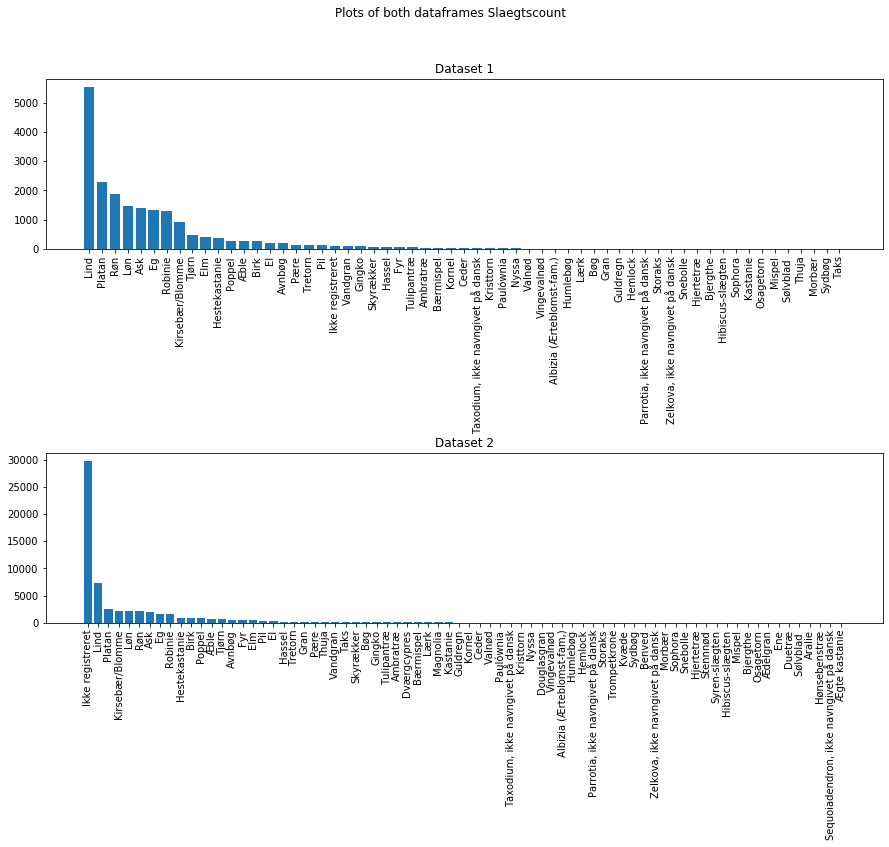

In [11]:
## If we want the subplots next to eachother:
#fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15,8))
#fig.suptitle('Plots of both dataframes Slaegtscount')
#axs1.bar(df1_slaegt.index, df1_slaegt['Count']);
#axs1.set_title('Dataset 1')
#axs1.bar(df2_slaegt.index, df2_slaegt['Count']);
#axs1.set_title('Dataset 2')

# Vertical subplots:
fig, axs = plt.subplots(2, figsize=(15,10))
fig.suptitle('Plots of both dataframes Slaegtscount')
axs[0].bar(df1_slaegt.index, df1_slaegt['Count']);
axs[0].set_title('Dataset 1')
axs[1].bar(df2_slaegt.index, df2_slaegt['Count']);
axs[1].set_title('Dataset 2')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90) # Rotate axis text for each subplot

plt.subplots_adjust(hspace=1.2) # Vertical spacing #wspace (horizontal spacing)

**IDEA:** It could be an idea to merge the two above plots in one (two bars different colors) Ordered A,B,C,..

# Feature: ``Neighbourhood``

In [12]:
df1['bydelsnavn'].unique()

array(['Vesterbro-Kongens Enghave', 'Valby', 'Nørrebro', 'Indre By',
       'Amager Øst', 'Vanløse', 'Østerbro', 'Amager Vest', 'Bispebjerg',
       'Brønshøj-Husum'], dtype=object)

In [13]:
df2['bydelsnavn'].unique()

array(['Vesterbro-Kongens Enghave', nan, 'Indre By', 'Nørrebro', 'Valby',
       'Vanløse', 'Bispebjerg', 'Brønshøj-Husum', 'Amager Øst',
       'Østerbro', 'Amager Vest'], dtype=object)

In [14]:
print(f'Amount of NaNs in dataset 2 (feature -> bydelsnavn): {df2.slaegtsnavn.isna().sum()}')

Amount of NaNs in dataset 2 (feature -> bydelsnavn): 23


In [15]:
df1.groupby('bydelsnavn')['id'].count()

bydelsnavn
Amager Vest                  2701
Amager Øst                   1232
Bispebjerg                    953
Brønshøj-Husum                946
Indre By                     2803
Nørrebro                     2239
Valby                        1778
Vanløse                      1026
Vesterbro-Kongens Enghave    2159
Østerbro                     4119
Name: id, dtype: int64

In [16]:
df2.groupby('bydelsnavn')['id'].count()

bydelsnavn
Amager Vest                  4477
Amager Øst                   3930
Bispebjerg                   8268
Brønshøj-Husum               4160
Indre By                     6105
Nørrebro                     6770
Valby                        4878
Vanløse                      3915
Vesterbro-Kongens Enghave    6679
Østerbro                     7824
Name: id, dtype: int64

**IDEA:** All neighbourhoods have more trees in the second dataset? **WHY?** Could investigate what trees are added?

In [17]:
df2_IB = df2[df2['bydelsnavn'] == 'Indre By'] # Only interested in one neighbourhood (Indre By)

In [18]:
df2_IB_group = df2_IB.groupby('slaegtsnavn')['id'].count() # Group by 'slaegtsnavn'
df2_IB_group = pd.DataFrame(df2_IB_group) # Make it to a dataframe
df2_IB_group.rename(columns={'id': 'Count'}, inplace=True) # Rename the column so it is now called count
df2_IB_group.sort_values(by=['Count'],ascending=False, inplace=True) # Sort it by largest first

In [19]:
#df2_IB_group # Distribution of tree sorts in the Indre By neighbourhood

# Feature: ``Trae_historie``
Small numbers but it could be funny to find out more about this

In [20]:
df2['trae_historie'].unique()

array(['Ikke registreret', 'Beskyttet via frivillig aftale', 'Hæderstræ',
       'Donationstræ', 'Kulturhistorisk'], dtype=object)

In [21]:
df2.groupby('trae_historie')['id'].count()

trae_historie
Beskyttet via frivillig aftale       14
Donationstræ                         35
Hæderstræ                            12
Ikke registreret                  59515
Kulturhistorisk                       4
Name: id, dtype: int64

**IDEA:** Interesting to investigate where in the city trees with a history is distributed.

# Check amount of NaN and 'Ikke registrerede' values in dataset

In [39]:
print(f'Number of observations in dataset 1: {len(df1)}')
df1.isna().sum()

Number of observations in dataset 1: 19956


FID                             0
id                              0
traeart                         0
slaegt                          0
dansk_navn                      1
slaegtsnavn                    16
planteaar                       2
plantet_halvaar                 0
garantiperioden_udloeber        0
plantemetode                    0
ejer                            0
driftsorganisation              0
driftsplan_navn                 0
driftsaftale_edoc_nr        19884
bemaerkning                 15687
andre_vaekstforhold         19449
fredet_beskyttet_trae           0
fredning_edoc_nr            19713
trae_historie                   0
botanisk_interesse              0
donor                       19932
anledning                   19954
saerligt_trae                   0
saerlig_trae_bem            19653
bydelsnavn                      0
fredet_trae_foto            19759
vejstatus                     831
wkb_geometry                    0
dtype: int64

It should be noted that many of the features are only containing NaN values.

In [42]:
print(f'Number of observations in dataset 2: {len(df2)}')
new = df2.isna().sum()
print(f'The first 20 features are printed below:')
new[0:20]

Number of observations in dataset 2: 59580
The first 20 features are printed below:


FID                        0
kategori                   0
saerligt_trae              0
id                         0
type                       0
element                 1068
under_element          54625
ny_dm_element           1778
ny_dm_under_element     1778
arbsted_tekst_id        1236
driftsplan_navn          296
enhedsomraade            224
traeart                    2
dansk_navn                 3
slaegtsnavn               23
planteaar              26783
plantet_halvaar            0
faeldningsaar              0
bydelsnavn              2574
omraade                    0
dtype: int64

Note that the feature ``fealningsaar`` don't contain any NaN-values. However by inspecting it further it is seen that all observations in the dataset will have *Ikke registreret* in this column.

In [43]:
df2[df2['faeldningsaar']== 'Ikke registreret'].count()['faeldningsaar']

59580

Lets therefor check all the features. First 20 is displayed.

In [57]:
df2[df2=='Ikke registreret'].count()[0:20]

FID                        0
kategori                   0
saerligt_trae              0
id                         0
type                       0
element                    0
under_element              0
ny_dm_element              0
ny_dm_under_element        0
arbsted_tekst_id           0
driftsplan_navn            0
enhedsomraade              0
traeart                25368
dansk_navn             25368
slaegtsnavn            29806
planteaar                  0
plantet_halvaar        46321
faeldningsaar          59580
bydelsnavn                 0
omraade                 4330
dtype: int64

In [59]:
df1[df1=='Ikke registreret'].count()

FID                             0
id                              0
traeart                       126
slaegt                        106
dansk_navn                    126
slaegtsnavn                   106
planteaar                       0
plantet_halvaar             14075
garantiperioden_udloeber    17969
plantemetode                  616
ejer                          268
driftsorganisation             51
driftsplan_navn                 0
driftsaftale_edoc_nr            0
bemaerkning                     0
andre_vaekstforhold             0
fredet_beskyttet_trae       19658
fredning_edoc_nr                0
trae_historie               19929
botanisk_interesse          19955
donor                           0
anledning                       0
saerligt_trae                   0
saerlig_trae_bem                0
bydelsnavn                      0
fredet_trae_foto                0
vejstatus                       0
wkb_geometry                    0
dtype: int64

# Feature: ``Planteaar investigated``

In [56]:
planteaar = df1.groupby('planteaar')['id'].count()
planteaar = planteaar.sort_values(ascending=False)
planteaar.iloc[0:10]


planteaar
2019.0    1119
2016.0     950
1995.0     913
2001.0     823
2005.0     823
1980.0     769
2018.0     680
2009.0     664
1990.0     645
1976.0     605
Name: id, dtype: int64

We could go in and have a look at *'Lokal planerne'* for the municipality, to see why there planted almost the double amunt of tree from 2018 to 2019. It could be because of the metro and the opening of the stations (can see where they have been planted and thereby try to couple it to the metro stations and maybe find that they are placed the same places), or it could be because the municipality agreed to plant more trees? 

# Feature: ``Ejer forhold``

In [48]:
df1.groupby('ejer')['id'].count() ## KK = Københavns kommune, TMF = Teknik og miljøforvaltningen

ejer
Ikke registreret      268
KK andre end TMF        4
Privat                 32
TMF                 19652
Name: id, dtype: int64

In [46]:
df2.groupby('ejer')['id'].count()

ejer
Ikke registreret    35588
KK andre end TMF       57
Privat               1003
TMF                 22932
Name: id, dtype: int64

# Feature: ``doner``

In [60]:
df1.groupby('donor')['id'].count()

donor
DSB                                          1
Det Kgl. Danske Kunstakademi                 1
FTM                                          1
Foreningen til Hovedstadens Forskønnelse     2
Lions Club                                   1
Plant et træ                                 2
SITAS                                        2
SITAS planteskole                            2
Valby Rotary Club                           12
Name: id, dtype: int64

In [61]:
df2.groupby('donor')['id'].count()

donor
DSB                                                    1
Danmarks naturfrednings Forening                       1
Den makedonske Ambassade                               1
Det Danske samfund i Østrig v. Barbara Kauders         1
Det Kgl. Danske Kunstakademi                           1
Eventyrernes klub                                      1
FTM                                                    6
Foreningen til Hovedstadens Forskønnelse               3
Gartneribrugets afsætningsudvalg                       1
Guangzhou International Award for Urban Innovation    10
Indsamling i England og Danmark                        1
Jf Peder Clement, modtaget fra Ålholm Arboret          6
Journalistforbundet, American Red Wood Association     2
Jugendaustauschwerk im Kreis Gütersloh E.V.            1
Lions Club                                             1
Plant et træ                                           2
SITAS                                                  4
SITAS planteskole        

# Feature: ``botanisk_interesse``

In [64]:
df2.groupby('botanisk_interesse')['id'].count()

botanisk_interesse
Ikke registreret    59427
Ja                    153
Name: id, dtype: int64

What kind of trees have a *'botanisk_interesse'* and where are they placed in Copenhagen?

In [6]:
df2.groupby('torso_hoejde')['id'].count()

torso_hoejde
0-3 meter        64
3-6 meter       179
over 6 meter     36
Name: id, dtype: int64

In [7]:
df2['torso_hoejde'].unique()

array([nan, '0-3 meter', '3-6 meter', 'over 6 meter'], dtype=object)

- Sammenligne med luftforurening?
- 